**Sarcasm Detection using NLP**

In [ ]:
import pandas as pd # It imports the pandas library as pd to work with data in tables and series for data analysis in Python.

In [ ]:
df = pd.read_csv('/content/Sarcasm_Detection_Dataset.csv') # It reads the CSV file from the given path and stores its content as a DataFrame in the variable df.

In [ ]:
df.head() # It displays the first five rows of the DataFrame df to give a quick preview of the data.

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [ ]:
df.shape # It returns a tuple showing the number of rows and columns in the DataFrame df.

(28619, 2)

In [ ]:
df.isnull().sum() # It shows the total number of missing (null) values in each column of the DataFrame df.

,0
is_sarcastic,0
headline,0


In [ ]:
# Import the necessary libraries for text processing and visualization
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.corpus import stopwords

# Download the stopwords and wordnet data from NLTK, and sets up tools for cleaning and lemmatizing text and creating word clouds.
nltk.download('stopwords') # stopwords are common words (like the, is, and) that are usually removed from text to focus on meaningful words
nltk.download('wordnet') # wordnet provides a dictionary of English words for tasks like finding word meanings or lemmatization.
# Lemmatization reduces a word to its base or dictionary form to ensure consistency in text analysis.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lem = WordNetLemmatizer() # It creates an object to convert words to their base form.
stop_words = set(stopwords.words("english")) # It stores common English words to be removed from text.
punctuations = string.punctuation # stores all punctuation characters to help in text cleaning. Punctuation refers to symbols like . , ! ? : ; used in writing to separate sentences and clarify meaning.

In [ ]:
def clean_text(news):
    """
    This function receives headlines sentence and returns clean sentence
    """
    news = news.lower() # converts the entire text to lowercase for uniformity.
    news = re.sub("\\n", "", news) # removes newline characters from the text.

    #Split the sentences into words
    words = list(news.split())

    words = [lem.lemmatize(word, "v") for word in words] # converts each word to its base verb form.
    words = [w for w in words if w not in punctuations] # removes any punctuation symbols from the words list.

    clean_sen = " ".join(words) # joins the cleaned words back into a single string.

    return clean_sen

In [ ]:
df['headline_len'] = df.headline.apply(lambda x: len(x.split())) # It creates a new column headline_len in the DataFrame that stores the number of words in each headline.

In [ ]:
df['news_headline'] = df.headline.apply(lambda news: clean_text(news)) # It creates a new column news_headline by applying the clean_text function to each headline
df.head() # displays the first five rows of the updated DataFrame

,is_sarcastic,headline,headline_len,news_headline
0,1,thirtysomething scientists unveil doomsday clo...,8,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,13,dem rep. totally nail why congress be fall sho...
2,0,eat your veggies: 9 deliciously different recipes,7,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,8,inclement weather prevent liar from get to work
4,1,mother comes pretty close to using word 'strea...,9,mother come pretty close to use word 'streamin...


In [ ]:
df.groupby(['is_sarcastic']).headline_len.mean() # It calculates and shows the average headline length for each group based on whether the headline is sarcastic (1) or not (0).

,headline_len
is_sarcastic,
0,9.815616
1,10.307540


In [ ]:
df.groupby(['is_sarcastic']).headline_len.max() # It shows the maximum headline length (in number of words) for both sarcastic and non-sarcastic headlines.

,headline_len
is_sarcastic,
0,38
1,151


In [ ]:
x = df['news_headline']
y = df['is_sarcastic']
# It assigns the cleaned headlines to variable x and the target labels (sarcastic or not) to variable y for model training or analysis.

In [135]:
x.head()

,news_headline
0,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nail why congress be fall sho...
2,eat your veggies: 9 deliciously different recipes
3,inclement weather prevent liar from get to work
4,mother come pretty close to use word 'streamin...


In [136]:
y.head()

,is_sarcastic
0,1
1,0
2,0
3,1
4,1


**WORDVEC**

In [ ]:
# What is a Word Vector?

# Computers don’t understand words, they understand numbers.

# Word vectors convert words into numbers (vectors) in such a way that similar words have similar numbers.

# Let’s say we train a model on sentences about animals.

# After training, the model might learn:

# "king" → [0.52, 0.78, ..., 0.11]

# "queen" → [0.54, 0.80, ..., 0.09]

# "apple" → [0.12, -0.33, ..., 0.88]

# Now:

# The vectors for "king" and "queen" will be close to each other in this number space because they are related (royalty, gender difference).

# But "apple" will have very different numbers because it’s about fruit.


# It creates a list of word lists by splitting each headline into individual words and shows the first five lists of words.

words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'of',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'why',
  'congress',
  'is',
  'falling',
  'short',
  'on',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'your', 'veggies:', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'from', 'getting', 'to', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'to',
  'using',
  'word',
  "'streaming'",
  'correctly']]

In [ ]:
# It imports the gensim library
# Then it sets the word vector size to 200, 
# and trains a Word2Vec model on the list of word lists to generate 200-dimensional vector representations for words based on their context.


import gensim

#Dimension of vectors we are generating
EMBEDDING_DIM = 200
# Sets the size of each word vector to 200 numbers.
# Example: the word "happy" → [0.12, -0.34, ..., 0.87] → 200 numbers in this case.
# Higher dimension = more details about word meaning, but requires more memory

# Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)
# This creates and trains the Word2Vec model on your words list.

In [ ]:
#vocab size
len(w2v_model.wv)
# It returns the total number of unique words (vocabulary size) that the Word2Vec model has learned from the dataset.
# We have now represented each of 38071 words by a 100dim vector.

38234

In [ ]:
from tensorflow.keras.preprocessing import text, sequence # It imports modules from Keras to help with text preprocessing and converting text into sequences of numbers for deep learning models.


In [ ]:
tokenizer = text.Tokenizer(num_words=35000) # creates a tokenizer to convert words into numbers, considering only the top 35,000 most frequent words.
tokenizer.fit_on_texts(words) # builds the word-to-index mapping based on the provided text data.
tokenized_train = tokenizer.texts_to_sequences(words) # converts each text (list of words) into a list of corresponding numerical indices.
x = sequence.pad_sequences(tokenized_train, maxlen = 20) # pads or trims each sequence to make them all 20 tokens long for uniform input to a neural network.

In [143]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [144]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        model.wv.get_vector(word)
    return weight_matrix

In [145]:
import numpy as np

In [146]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

**Training**

In [ ]:
from sklearn.model_selection import train_test_split # It imports the function train_test_split from scikit-learn to split data into training and testing sets for model evaluation.


In [148]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [149]:
y_train.value_counts()

,count
is_sarcastic,
0,11988
1,10907


In [151]:
max_words = 38235    # how many unique words to use (i.e num rows in embedding vector)
max_len = 20       # max number of words in a headline to use
oov_token = '00_V'    # for the words which are not in training samples
padding_type = 'post'   # padding type
trunc_type = 'post'    # truncation for headlines longer than max length
embed_size = 200    # how big is each word vector

In [152]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [153]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim=max_words,  # Match vocab size
    output_dim=embed_size,  # Match embedding dimension
    weights=[embedding_vectors],  # Ensure this matches shape (max_words, embed_size)
    trainable=False  # Set False if using static embeddings
)

**RNN MODEL**

In [156]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [157]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
history_rnn = model_rnn.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6058 - loss: 0.6276 - val_accuracy: 0.8433 - val_loss: 0.3562 - learning_rate: 0.0010
Epoch 2/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.8989 - loss: 0.2657 - val_accuracy: 0.8559 - val_loss: 0.3454 - learning_rate: 0.0010
Epoch 3/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.9535 - loss: 0.1369 - val_accuracy: 0.8499 - val_loss: 0.3864 - learning_rate: 0.0010
Epoch 4/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.9786 - loss: 0.0745 - val_accuracy: 0.8484 - val_loss: 0.4836 - learning_rate: 0.0010
Epoch 5/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.9898 - loss: 0.0383 - val_accuracy: 0.8513 - val_loss: 0.5192 - learning_rate: 1.0000e-04


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8480 - loss: 0.5353
Test Loss: 0.5192084312438965
Test Accuracy: 0.8513277173042297
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


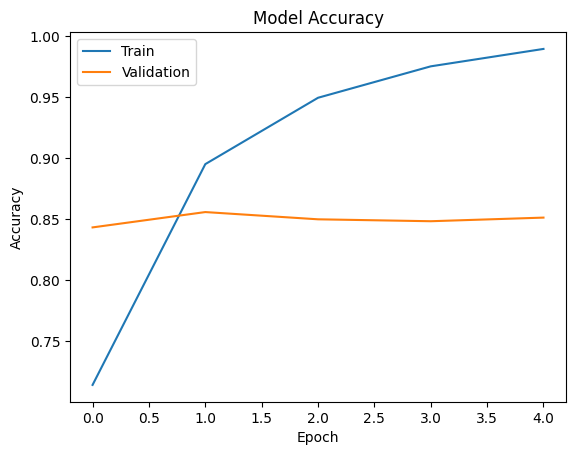

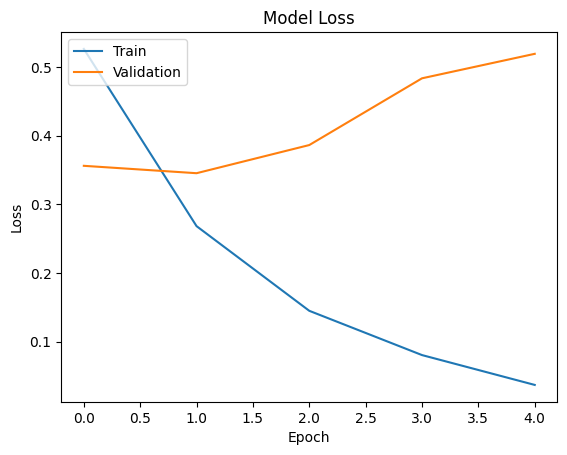

In [160]:
# Evaluate the model
score = model_rnn.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# List all data in history
print(history_rnn.history.keys())

# Summarize history for accuracy
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [161]:
# Predictions and evaluation
y_pred = model_rnn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Threshold for binary classification (adjust as needed)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Classification report
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Precision: 0.8514299613292361
Recall: 0.8513277428371768
F1 Score: 0.8511902906463378

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.85      0.87      0.86      2997
     Class 1       0.86      0.83      0.84      2727

    accuracy                           0.85      5724
   macro avg       0.85      0.85      0.85      5724
weighted avg       0.85      0.85      0.85      5724



**LSTM**

In [162]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [163]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [164]:
history_lstm = model_lstm.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.7200 - loss: 0.5212 - val_accuracy: 0.8601 - val_loss: 0.3195 - learning_rate: 0.0010
Epoch 2/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.9347 - loss: 0.1813 - val_accuracy: 0.8636 - val_loss: 0.3409 - learning_rate: 0.0010
Epoch 3/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9753 - loss: 0.0751 - val_accuracy: 0.8620 - val_loss: 0.4294 - learning_rate: 0.0010
Epoch 4/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.9919 - loss: 0.0304 - val_accuracy: 0.8609 - val_loss: 0.5111 - learning_rate: 1.0000e-04
Epoch 5/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.8620 - val_loss: 0.5651 - learning_rate: 1.0000e-04


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8586 - loss: 0.5909
Test Loss: 0.5651159882545471
Test Accuracy: 0.8619846105575562
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


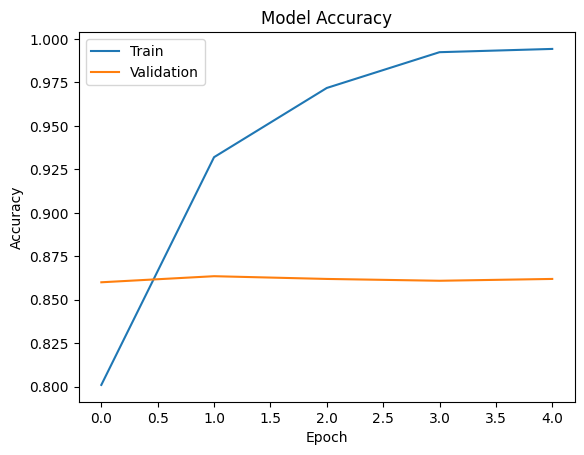

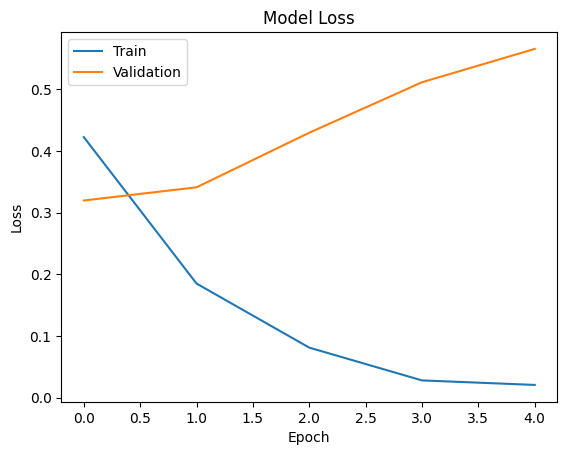

In [165]:
# Evaluate the model
score = model_lstm.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# List all data in history
print(history_lstm.history.keys())

# Summarize history for accuracy
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [167]:
# Predictions and evaluation
y_pred = model_lstm.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Threshold for binary classification (adjust as needed)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Classification report
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Precision: 0.8619858446756813
Recall: 0.8619846261355696
F1 Score: 0.8619138700238739

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.86      0.88      0.87      2997
     Class 1       0.86      0.85      0.85      2727

    accuracy                           0.86      5724
   macro avg       0.86      0.86      0.86      5724
weighted avg       0.86      0.86      0.86      5724



**BIDIRECTIONAL LSTM**

In [168]:
model_bidir = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [169]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_bidir = model_bidir.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.7294 - loss: 0.5025 - val_accuracy: 0.8669 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 2/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9507 - loss: 0.1345 - val_accuracy: 0.8606 - val_loss: 0.3432 - learning_rate: 0.0010
Epoch 3/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 75s 105ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.8581 - val_loss: 0.5153 - learning_rate: 0.0010
Epoch 4/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.8609 - val_loss: 0.5710 - learning_rate: 1.0000e-04
Epoch 5/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9986 - loss: 0.0068 - val_accuracy: 0.8611 - val_loss: 0.6323 - learning_rate: 1.0000e-04


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8588 - loss: 0.6560
Test Loss: 0.6323453187942505
Test Accuracy: 0.8611111044883728
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


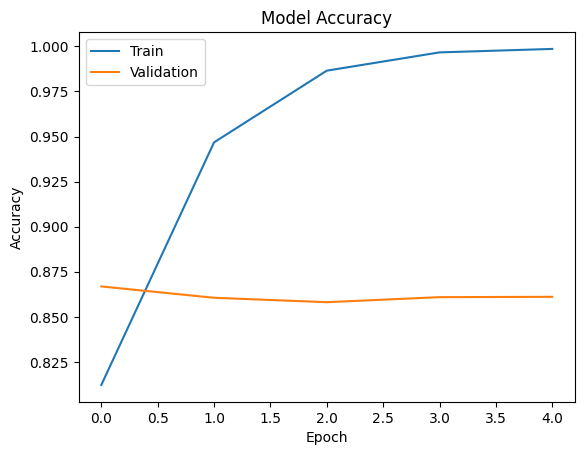

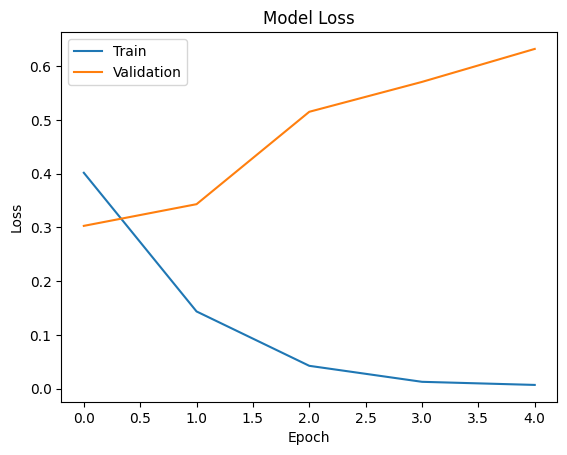

In [ ]:
# Evaluate the model
score = model_bidir.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# List all data in history
print(history_bidir.history.keys())

# Summarize history for accuracy
plt.plot(history_bidir.history['accuracy'])
plt.plot(history_bidir.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predictions and evaluation
y_pred = model_bidir.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Threshold for binary classification (adjust as needed)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Classification report
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step
Precision: 0.8613035846267555
Recall: 0.8611111111111112
F1 Score: 0.8611540978843903

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.87      0.86      0.87      2997
     Class 1       0.85      0.86      0.86      2727

    accuracy                           0.86      5724
   macro avg       0.86      0.86      0.86      5724
weighted avg       0.86      0.86      0.86      5724

